In [47]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

with open('data/data/driving_log.csv') as csvfile:
    frames = np.array(list(csv.reader(csvfile)))[1:,0:4]

print(frames.shape)
print(frames[0])
print(frames[1])
print(frames.shape[0]/24/60)

(8036, 4)
['IMG/center_2016_12_01_13_30_48_287.jpg'
 ' IMG/left_2016_12_01_13_30_48_287.jpg'
 ' IMG/right_2016_12_01_13_30_48_287.jpg' ' 0']
['IMG/center_2016_12_01_13_30_48_404.jpg'
 ' IMG/left_2016_12_01_13_30_48_404.jpg'
 ' IMG/right_2016_12_01_13_30_48_404.jpg' ' 0']
5.580555555555555


In [48]:
img_shape = (32, 32)
def plot_images(images):    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()    

(160, 320, 3)


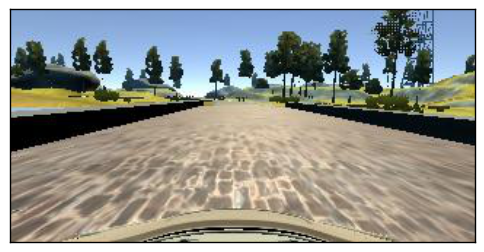

(32, 32, 3)


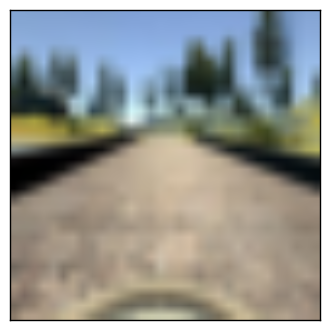

In [61]:
import scipy.misc as sp

def showImg(img):
    print(img.shape)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
imgs = frames[:,:3]
plots = np.concatenate([imgs[0],imgs[1],imgs[2]])
pes = np.array([])
baseImgDir = 'data/data/'
for plot in plots:
    img = mpimg.imread(baseImgDir + plot.strip())
    showImg(img)
    img2 = sp.imresize(img,[32,32])
    showImg(img2)
#    np.concatenate(pes,i)
    break
#print(pes)